In [8]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy import ndimage

In [127]:
def f(_focal_length, _k, _theta):
    if _k > 0:
        return _focal_length / _k * np.tan(_k * _theta)
    elif _k < 0:
        return _focal_length / _k * np.sin(_k * _theta)
    else:
        return _focal_length * _theta
    pass

In [3]:
source_map = np.indices((900, 900), dtype=np.int32)
cy, cx = np.array((900, 900)) // 2
center = np.array([[[cx]], [[cy]]])
source_map = source_map - center

In [4]:
source_map[0]

array([[-450, -450, -450, ..., -450, -450, -450],
       [-449, -449, -449, ..., -449, -449, -449],
       [-448, -448, -448, ..., -448, -448, -448],
       ...,
       [ 447,  447,  447, ...,  447,  447,  447],
       [ 448,  448,  448, ...,  448,  448,  448],
       [ 449,  449,  449, ...,  449,  449,  449]])

In [5]:
source_radius = np.sqrt(source_map[0] * source_map[0] + source_map[1] * source_map[1])
source_radius.shape

(900, 900)

In [6]:
angle = np.arctan2(source_map[1], source_map[0])
angle.shape

(900, 900)

In [7]:
theta = source_radius / 120
theta.shape

(900, 900)

In [8]:
dist_radius = f(120, 1, theta)
dist_radius.shape

(900, 900)

In [9]:
map_x = dist_radius * np.cos(angle) + cx
map_y = dist_radius * np.sin(angle) + cy
map_x.shape

(900, 900)

In [10]:
img = cv2.imread(r'C:\Users\Banayaki\Downloads\rthickgrid-01_repeat_preview.png')
dist_img = cv2.remap(img, map_x.astype(np.float32), map_y.astype(np.float32), cv2.INTER_LINEAR)
dist_img.shape

(900, 900, 3)

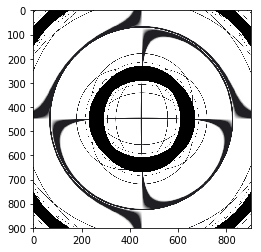

In [11]:
plt.imshow(dist_img)

# Vectorized

In [134]:
filename = '3.png'

In [135]:
img = cv2.imread(rf'{filename}')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

CPU times: user 381 ms, sys: 3.68 ms, total: 384 ms
Wall time: 364 ms


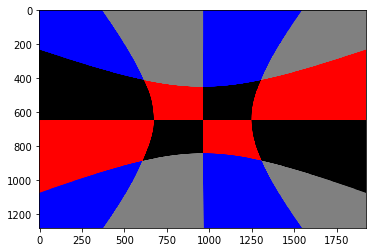

In [151]:
%%time
focal_length = 500
k = -1

img_shape = img.shape[:2]
source_map = np.indices(img_shape, dtype=np.int32)
cy, cx = np.array(img_shape) // 2
center = np.array([[[cy]], [[cx]]])
source_map = source_map - center
source_radius = np.sqrt(source_map[0] * source_map[0] + source_map[1] * source_map[1])
angle = np.arctan2(source_map[0], source_map[1])
# theta = source_radius / focal_length
theta = np.arctan2(source_radius, focal_length)

dist_radius = f(focal_length, k, theta)
# dist_radius = focal_length * np.sin(np.arctan2(source_radius, focal_length))

map_x = dist_radius * np.cos(angle) + cx
map_y = dist_radius * np.sin(angle) + cy
dist_img = cv2.remap(img, map_x.astype(np.float32),  map_y.astype(np.float32), cv2.INTER_LINEAR)
plt.imshow(dist_img)

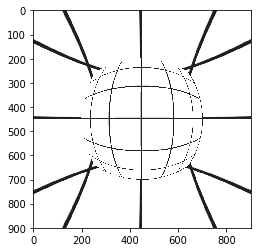

In [8]:
dist_image = np.zeros(np.array(img.shape), np.uint8)
for source_x in range(img.shape[1]):
    for source_y in range(img.shape[0]):
        dist_img[int(round(map_y[source_y][source_x]))][int(round(map_x[source_y][source_x]))] = img[source_y][source_x]
plt.imshow(dist_img)